# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## Данные

**Загружаем данные**

In [166]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report

In [167]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [168]:
import matplotlib.pyplot as plt

In [169]:
index = 255

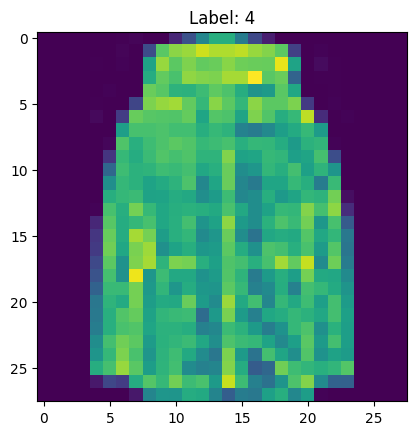

In [170]:
plt.imshow(x_train[index], cmap='viridis')
plt.title(f'Label: {y_train[index]}')
plt.show()

## Предобработка

**Нормализуйте данные x_train и x_test **

In [171]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [172]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

**Измените форму массивов x_train и x_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

**Преобразуйте  y_train и y_test в one_hot представления **

In [173]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU

* Выходной полносвязный слой с 10 нейронами с softmax

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

Попробуем улучшить модель, добавив больше слоев, больше фильтров, регуляризацию и оптимизатор Adam.

In [174]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [175]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

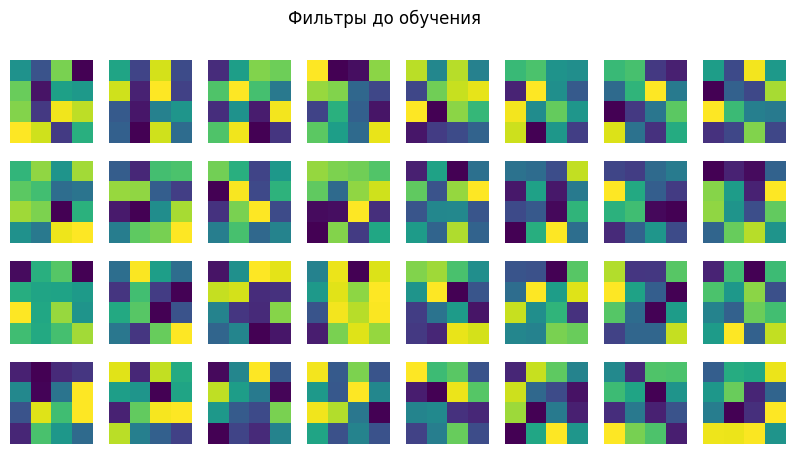

In [176]:
# Извлечение весов первого сверточного слоя до обучения
weights_before_training = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 5))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(weights_before_training[:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Фильтры до обучения')
plt.show()

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [177]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.6869 - accuracy: 0.7528 - val_loss: 0.3996 - val_accuracy: 0.8483
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4105 - accuracy: 0.8560 - val_loss: 0.3255 - val_accuracy: 0.8759
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3437 - accuracy: 0.8788 - val_loss: 0.2855 - val_accuracy: 0.8923
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3051 - accuracy: 0.8915 - val_loss: 0.2744 - val_accuracy: 0.8978
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2749 - accuracy: 0.9028 - val_loss: 0.2646 - val_accuracy: 0.9039
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2594 - accuracy: 0.9063 - val_loss: 0.2535 - val_accuracy: 0.9072
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2382 - accuracy: 0.9146 - val_loss: 0.2432 - val_accuracy: 0.9111
Epoch 

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [178]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [179]:
y_true = np.argmax(y_test, axis=1)

In [180]:
y_pred = np.argmax(y_pred, axis=1)

In [181]:
report = classification_report(y_true, y_pred)

In [182]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.88      0.87      1000
           3       0.91      0.92      0.92      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.69      0.73      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Дополнительно

* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

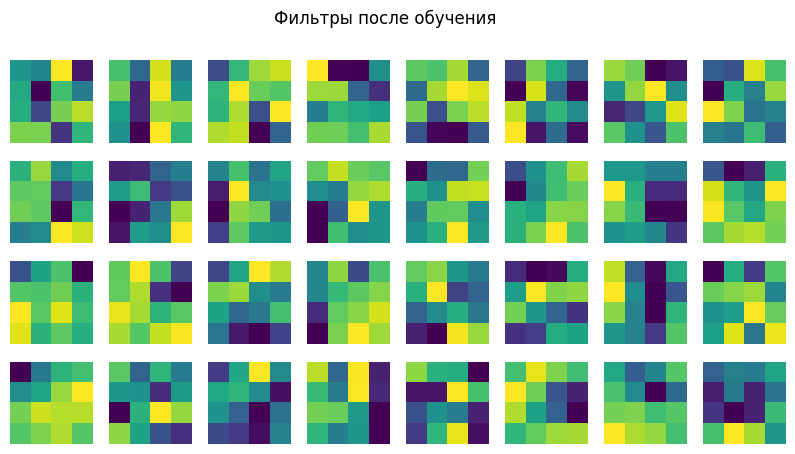

In [184]:
# Извлечение весов первого сверточного слоя после обучения
weights_after_training = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 5))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(weights_after_training[:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Фильтры после обучения')
plt.show()